# WEATHER DATA: EDA AND ADVANCED ANALYSIS

### ABOUT THE DATASET

Dataset: https://data.open-power-system-data.org/weather_data/2017-07-03

| Field Name    | Type (Format)                         | Description                                        |
|---------------|---------------------------------------|----------------------------------------------------|
| timestamp     | date-time (YYYY-MM-DDTHH:MM:SSZ)    | Start of timeperiod in Coordinated Universal Time |
| cumulated hours | number (integer)                    | Summarized number of hours for the timeperiod of the dataset |
| lat           | geopoint (lat)                       | Latitude coordinates                               |
| lon           | geopoint (lon)                       | Longitude coordinates                              |
| v1            | number (float)                       | Wind speed 2 meters above displacement height     |
| v2            | number (float)                       | Wind speed 10 meters above displacement height    |
| v_50m         | number (float)                       | Wind speed 50 meters above ground                  |
| h1            | number (float)                       | Height above ground corresponding to v1            |
| h2            | number (integer)                     | Height above ground corresponding to v2            |
| z0            | number (integer)                     | Roughness length                                   |
| SWTDN         | number (float)                       | Total top-of-the-atmosphere horizontal radiation   |
| SWGDN         | number (float)                       | Total ground horizontal radiation                  |
| T             | number (float)                       | Temperature 2 meters above displacement height    |
| rho           | number (float)                       | Air density at surface                             |
| p             | number (float)                       | Air pressure at surface                            |



### UNDERSTAND THE DATA COLUMNS

1. **Wind speed at different heights**:
   - **v1**: Wind speed at 2 meters above displacement height.
   - **v2**: Wind speed at 10 meters above displacement height.
   - **v_50m**: Wind speed at 50 meters above ground.
   - **h1**: Height above ground corresponding to v1.
   - **h2**: Height above ground corresponding to v2.
   - These variables represent wind speeds measured at different heights above the ground or displacement height. Wind speed is crucial for various applications, such as determining wind energy potential, assessing ventilation in buildings, and predicting weather patterns.

2. **Roughness length** (**z0**):
   - Roughness length is a measure of the roughness of the Earth's surface. It is used in meteorology and environmental modeling to parameterize the effects of surface roughness on atmospheric flow. A smaller roughness length indicates a smoother surface, while a larger roughness length indicates a rougher surface.

3. **Radiation**:
   - **SWTDN**: Total top-of-the-atmosphere horizontal radiation.
   - **SWGDN**: Total ground horizontal radiation.
   - Radiation variables represent solar radiation. SWTDN is the total solar radiation received at the top of the atmosphere, while SWGDN is the total solar radiation received at the ground level after passing through the atmosphere. Solar radiation is crucial for understanding energy balance, weather patterns, and climate.

4. **Temperature** (**T**):
   - Temperature at 2 meters above displacement height. This represents the air temperature, which is fundamental for understanding weather conditions, climate patterns, and their impacts on various systems such as agriculture, human health, and infrastructure.

5. **Air density** (**rho**):
   - Air density at the surface. Air density is influenced by temperature, pressure, and humidity. It is important for aerodynamics, air quality modeling, and understanding atmospheric processes.

6. **Air pressure** (**p**):
   - Air pressure at the surface. Air pressure is the force exerted by the weight of air molecules above a given point on the Earth's surface. It is important for weather forecasting, aviation, and determining atmospheric stability.


# ANALYSIS

In [2]:
#import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set()

In [3]:
#load the data

df = pd.read_csv("weather_data_result_GER_2016.csv")

In [4]:
#make a copy of original dataset

weather_data = df.copy()

In [5]:
#overview of dataset

weather_data.head(10)

,timestamp,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
0,2016-01-01T00:00:00Z,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.000000,0.000000,277.350159,1.236413,99282.710938
1,2016-01-01T01:00:00Z,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.000000,0.000000,277.025665,1.239390,99300.164062
2,2016-01-01T02:00:00Z,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.000000,0.000000,277.223755,1.243861,99310.992188
3,2016-01-01T03:00:00Z,3,47.5,5.625,0.96,1.35,1.62,2,10,0.052480,0.000000,0.000000,277.133240,1.247390,99314.773438
4,2016-01-01T04:00:00Z,4,47.5,5.625,1.14,1.56,1.83,2,10,0.052480,0.000000,0.000000,276.867767,1.248869,99324.796875
5,2016-01-01T05:00:00Z,5,47.5,5.625,1.33,1.84,2.16,2,10,0.052465,0.000000,0.000000,276.581299,1.250242,99324.320312
6,2016-01-01T06:00:00Z,6,47.5,5.625,1.51,2.11,2.51,2,10,0.052449,0.000000,0.000000,276.347198,1.250865,99305.062500
7,2016-01-01T07:00:00Z,7,47.5,5.625,1.63,2.29,2.73,2,10,0.052434,27.453129,4.265625,276.269531,1.250548,99271.078125
8,2016-01-01T08:00:00Z,8,47.5,5.625,1.70,2.32,2.75,2,10,0.052434,189.437500,45.843750,276.744415,1.249260,99248.015625
9,2016-01-01T09:00:00Z,9,47.5,5.625,1.84,2.44,2.89,2,10,0.052419,334.000000,146.000000,277.890259,1.244758,99227.468750


In [6]:
#last 10 rows

weather_data.tail(10)

,timestamp,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
2248694,2016-12-31T14:00:00Z,8774,55.0,15.0,10.16,12.20,13.84,2,10,0.000943,18.679689,0.454956,278.232971,1.277306,101959.531250
2248695,2016-12-31T15:00:00Z,8775,55.0,15.0,10.31,12.41,14.09,2,10,0.000977,0.000000,0.000000,278.325531,1.276158,101915.609375
2248696,2016-12-31T16:00:00Z,8776,55.0,15.0,10.39,12.52,14.24,2,10,0.000995,0.000000,0.000000,278.442261,1.274909,101876.070312
2248697,2016-12-31T17:00:00Z,8777,55.0,15.0,10.40,12.53,14.26,2,10,0.000998,0.000000,0.000000,278.516479,1.274024,101842.093750
2248698,2016-12-31T18:00:00Z,8778,55.0,15.0,10.37,12.50,14.13,2,10,0.000991,0.000000,0.000000,278.547791,1.273425,101803.382812
2248699,2016-12-31T19:00:00Z,8779,55.0,15.0,10.45,12.60,14.26,2,10,0.001006,0.000000,0.000000,278.549011,1.272779,101755.281250
2248700,2016-12-31T20:00:00Z,8780,55.0,15.0,10.52,12.69,14.39,2,10,0.001021,0.000000,0.000000,278.574341,1.271909,101698.242188
2248701,2016-12-31T21:00:00Z,8781,55.0,15.0,10.49,12.65,14.38,2,10,0.001014,0.000000,0.000000,278.634644,1.270996,101653.398438
2248702,2016-12-31T22:00:00Z,8782,55.0,15.0,10.47,12.63,14.41,2,10,0.001009,0.000000,0.000000,278.678162,1.270252,101609.484375
2248703,2016-12-31T23:00:00Z,8783,55.0,15.0,10.39,12.53,14.33,2,10,0.000993,0.000000,0.000000,278.720184,1.269202,101545.859375


In [7]:
# shape of the dataset

weather_data.shape

(2248704, 15)

2.25 M rows and 15 columns

In [8]:
# info of the data

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248704 entries, 0 to 2248703
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        object 
 1   cumulated hours  int64  
 2   lat              float64
 3   lon              float64
 4   v1               float64
 5   v2               float64
 6   v_50m            float64
 7   h1               int64  
 8   h2               int64  
 9   z0               float64
 10  SWTDN            float64
 11  SWGDN            float64
 12  T                float64
 13  rho              float64
 14  p                float64
dtypes: float64(11), int64(3), object(1)
memory usage: 257.3+ MB


## DATA CLEANING

#### Changing data type of "timestamp" column

In [9]:
# change the data type for "timestamp" column

weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])



In [10]:
#check the data type of "timestamp" column

weather_data['timestamp'].dtype

datetime64[ns, UTC]

#### Extracting month and day of the week 

In [11]:
# Extract month and day of the week

weather_data['month'] = weather_data['timestamp'].dt.month

weather_data['day_of_week'] = weather_data['timestamp'].dt.dayofweek

#### Convert numbers to names

In [12]:
# Convert numerical month to month names
weather_data['month'] = weather_data['timestamp'].dt.strftime('%B')

# Convert numerical day of the week to day names
weather_data['day_of_week'] = weather_data['timestamp'].dt.strftime('%A')

In [13]:
weather_data.head(10)

,timestamp,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p,month,day_of_week
0,2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.000000,0.000000,277.350159,1.236413,99282.710938,January,Friday
1,2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.000000,0.000000,277.025665,1.239390,99300.164062,January,Friday
2,2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.000000,0.000000,277.223755,1.243861,99310.992188,January,Friday
3,2016-01-01 03:00:00+00:00,3,47.5,5.625,0.96,1.35,1.62,2,10,0.052480,0.000000,0.000000,277.133240,1.247390,99314.773438,January,Friday
4,2016-01-01 04:00:00+00:00,4,47.5,5.625,1.14,1.56,1.83,2,10,0.052480,0.000000,0.000000,276.867767,1.248869,99324.796875,January,Friday
5,2016-01-01 05:00:00+00:00,5,47.5,5.625,1.33,1.84,2.16,2,10,0.052465,0.000000,0.000000,276.581299,1.250242,99324.320312,January,Friday
6,2016-01-01 06:00:00+00:00,6,47.5,5.625,1.51,2.11,2.51,2,10,0.052449,0.000000,0.000000,276.347198,1.250865,99305.062500,January,Friday
7,2016-01-01 07:00:00+00:00,7,47.5,5.625,1.63,2.29,2.73,2,10,0.052434,27.453129,4.265625,276.269531,1.250548,99271.078125,January,Friday
8,2016-01-01 08:00:00+00:00,8,47.5,5.625,1.70,2.32,2.75,2,10,0.052434,189.437500,45.843750,276.744415,1.249260,99248.015625,January,Friday
9,2016-01-01 09:00:00+00:00,9,47.5,5.625,1.84,2.44,2.89,2,10,0.052419,334.000000,146.000000,277.890259,1.244758,99227.468750,January,Friday


#### Create columns for date and time

In [14]:
#Make separate columns for date and time

weather_data['time'] = weather_data['timestamp'].dt.time
weather_data['date'] = weather_data['timestamp'].dt.date

#### Check for null values

In [15]:
#check for null values

weather_data.isnull().sum()

timestamp          0
cumulated hours    0
lat                0
lon                0
v1                 0
v2                 0
v_50m              0
h1                 0
h2                 0
z0                 0
SWTDN              0
SWGDN              0
T                  0
rho                0
p                  0
month              0
day_of_week        0
time               0
date               0
dtype: int64

No null values

#### Check for duplicate values

In [16]:
# check for duplicate values

weather_data.duplicated().sum()

0

No duplicate values

#### Check if the column names are consistent

In [17]:
#extract column names

weather_data.columns

Index(['timestamp', 'cumulated hours', 'lat', 'lon', 'v1', 'v2', 'v_50m', 'h1',
       'h2', 'z0', 'SWTDN', 'SWGDN', 'T', 'rho', 'p', 'month', 'day_of_week',
       'time', 'date'],
      dtype='object')

No whitespaces in the column names, we can proceed.

### Statistical Summary

In [18]:
#Statistical summary

pd.set_option('display.float_format', lambda x: '%.2f' % x)

weather_data.describe()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
count,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00,2248704.00
mean,4391.50,51.25,10.31,2.94,4.30,6.06,2.69,10.69,0.20,277.80,145.73,282.37,1.21,98551.41
std,2535.72,2.30,2.88,2.13,2.56,3.12,1.97,1.97,0.40,360.49,222.54,7.93,0.05,3217.84
min,0.00,47.50,5.62,0.00,0.00,0.00,2.00,10.00,0.00,0.00,0.00,248.43,1.01,84310.55
25%,2195.75,49.38,7.97,1.29,2.43,3.80,2.00,10.00,0.05,0.00,0.00,276.11,1.18,96593.33
50%,4391.50,51.25,10.31,2.47,3.70,5.73,2.00,10.00,0.07,27.49,5.23,281.56,1.21,99095.90
75%,6587.25,53.12,12.66,4.01,5.64,7.81,2.00,10.00,0.11,521.56,229.19,288.72,1.25,101096.77
max,8783.00,55.00,15.00,18.45,22.92,27.41,14.00,22.00,2.50,1201.50,985.75,309.00,1.37,104331.87


## Exploratory Data Analysis

#### Mean of numerical columns by Month

In [19]:
weather_data.groupby('month').mean().sort_values(by='cumulated hours', ascending=False)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
month,,,,,,,,,,,,,,
December,8411.50,51.25,10.31,3.19,4.68,6.65,2.60,10.60,0.18,80.66,33.99,274.77,1.26,99630.97
November,7679.50,51.25,10.31,3.10,4.56,6.50,2.71,10.71,0.20,114.74,45.00,276.79,1.23,98432.83
October,6947.50,51.25,10.31,2.75,4.00,5.61,2.78,10.78,0.22,192.87,86.69,281.72,1.22,99039.02
September,6215.50,51.25,10.31,2.37,3.52,5.11,2.81,10.81,0.23,293.77,173.99,290.26,1.18,98797.01
August,5483.50,51.25,10.31,2.60,3.80,5.40,2.83,10.83,0.23,390.33,230.38,290.95,1.18,98839.61
July,4739.50,51.25,10.31,2.56,3.74,5.22,2.83,10.83,0.23,459.06,256.27,291.60,1.17,98632.92
June,4007.50,51.25,10.31,2.32,3.40,4.76,2.81,10.81,0.23,478.43,255.04,289.88,1.18,98354.61
May,3275.50,51.25,10.31,2.78,4.13,5.93,2.76,10.76,0.22,442.25,246.31,286.13,1.19,98347.50
April,2543.50,51.25,10.31,2.86,4.19,5.86,2.66,10.66,0.19,361.73,186.91,280.53,1.22,98154.77


#### Line Plot of Average wind speed v1 over Months

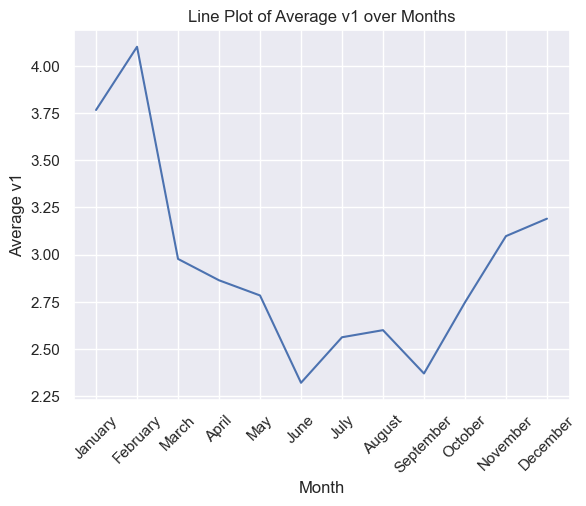

In [41]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April' ,'May', 'June', 'July','August','September','October','November','December']

# Group by 'month' and calculate mean, then sort by 'cumulated hours'
mean_data_by_month = weather_data.groupby('month').mean().sort_values(by='cumulated hours', ascending=False)

# Reindex to enforce the order of months
mean_data_by_month = mean_data_by_month.reindex(month_order)

# Create the line plot
plt.plot(mean_data_by_month.index, mean_data_by_month['v1'])

# Labeling axes and title
plt.xlabel('Month')
plt.ylabel('Average v1')
plt.title('Line Plot of Average v1 over Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average wind speed v2 over Months

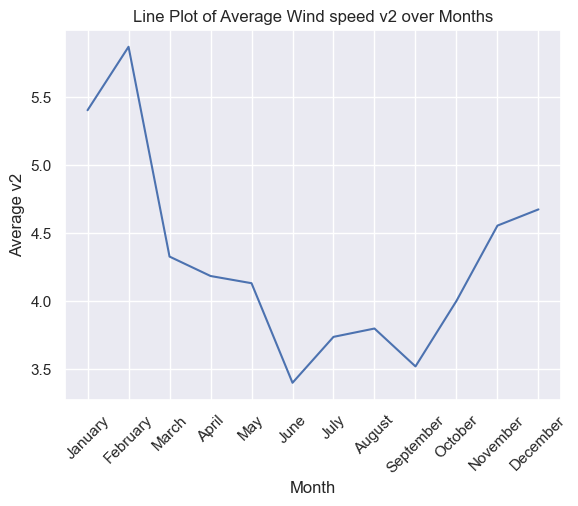

In [42]:
# Create the line plot
plt.plot(mean_data_by_month.index, mean_data_by_month['v2'])

# Labeling axes and title
plt.xlabel('Month')
plt.ylabel('Average v2')
plt.title('Line Plot of Average Wind speed v2 over Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average Cumulated Hours over Months

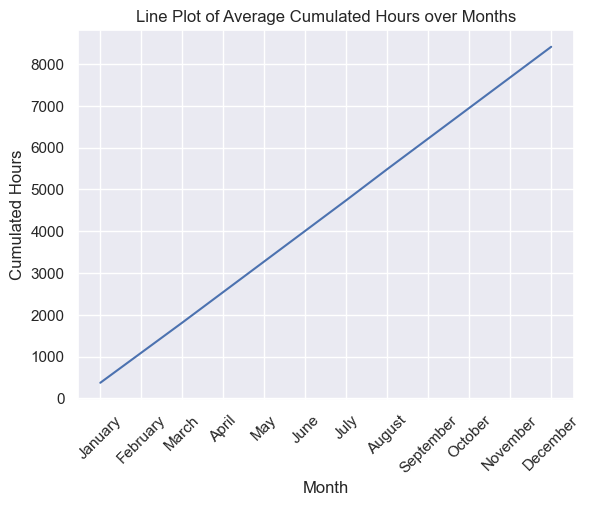

In [43]:
# Create the line plot
plt.plot(mean_data_by_month.index, mean_data_by_month['cumulated hours'])

# Labeling axes and title
plt.xlabel('Month')
plt.ylabel('Cumulated Hours')
plt.title('Line Plot of Average Cumulated Hours over Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average SWTDN over Months

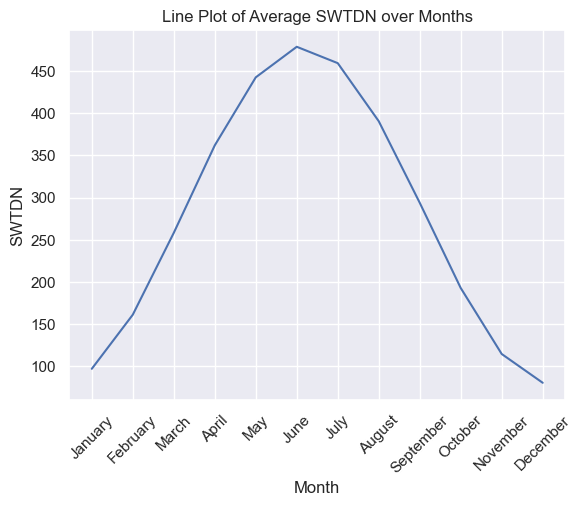

In [46]:
# Create the line plot
plt.plot(mean_data_by_month.index, mean_data_by_month['SWTDN'])

# Labeling axes and title
plt.xlabel('Month')
plt.ylabel('SWTDN')
plt.title('Line Plot of Average SWTDN over Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average SWGDN over Months

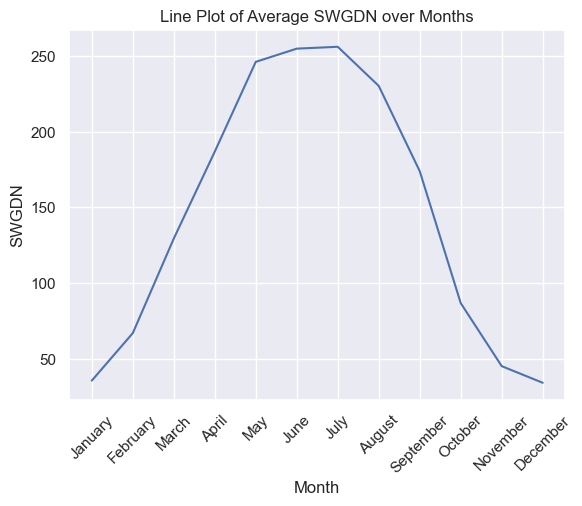

In [47]:
# Create the line plot
plt.plot(mean_data_by_month.index, mean_data_by_month['SWGDN'])

# Labeling axes and title
plt.xlabel('Month')
plt.ylabel('SWGDN')
plt.title('Line Plot of Average SWGDN over Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### DEATILED INSIGHTS 1


1. **Seasonal Variations**:
   - Cumulated hours show a general increasing trend from January to December, indicating longer daylight hours during the summer months and shorter daylight hours during the winter months.
   - Wind speeds (v1, v2, v_50m) tend to increase from summer to winter months, with the highest speeds observed in January and December.
   - Solar radiation (SWTDN, SWGDN) and temperature (T) show a peak during the summer months and decrease during the winter months.

2. **Height Above Ground**:
   - Heights above ground (h1, h2) remain relatively constant throughout the year, suggesting consistent measurement heights for wind speeds.

3. **Roughness Length (z0)**:
   - Roughness length remains relatively constant throughout the year, indicating consistent surface roughness conditions.

4. **Air Density and Pressure**:
   - Air density (rho) and air pressure (p) show slight variations throughout the year but generally remain within acceptable ranges.


#### Max of numerical columns by Month

In [20]:
weather_data.groupby('month')[['cumulated hours','v1','v2','v_50m','h1','h2','z0','SWTDN','SWGDN','T','rho','p']].max().sort_values(by='cumulated hours', ascending=False)

,cumulated hours,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
month,,,,,,,,,,,,
December,8783,18.45,22.92,27.41,12,20,2.10,491.75,367.62,284.36,1.34,104331.87
November,8039,16.92,21.05,25.09,13,21,2.36,647.00,491.38,289.86,1.34,103582.34
October,7319,13.45,16.57,19.48,14,22,2.48,857.50,659.50,298.22,1.30,104051.34
September,6575,12.81,15.64,18.31,14,22,2.50,1033.00,804.25,306.86,1.26,102790.89
August,5855,12.18,14.79,17.15,14,22,2.50,1148.00,905.75,309.00,1.26,102747.07
July,5111,13.42,16.68,19.62,14,22,2.48,1197.00,967.00,308.08,1.25,102425.72
June,4367,11.87,14.45,17.47,14,22,2.43,1201.50,985.75,308.49,1.26,102594.77
May,3647,10.74,12.89,15.25,13,21,2.32,1192.00,952.00,301.27,1.29,102983.44
April,2903,12.37,15.04,17.26,12,20,2.10,1126.00,920.75,296.27,1.30,103280.99


### DETAILED INSIGHTS 2

1. **Cumulated Hours**:
   - The cumulated hours generally increase from January to December, indicating longer daylight hours as the year progresses.
   - December recorded the highest cumulated hours, indicating the longest observation period among all months.

2. **Wind Speeds**:
   - Wind speeds (v1, v2, v_50m) generally follow a similar trend across months, with higher values observed in winter months and lower values in summer months.
   - February and March recorded the highest wind speeds among all months, which is typical for colder months when atmospheric conditions are more turbulent.

3. **Height Above Ground** (h1, h2):
   - Heights above ground (h1, h2) remain constant across months, suggesting consistent measurement heights for wind speeds throughout the year.

4. **Roughness Length (z0)**:
   - The roughness length (z0) remains relatively constant across months, indicating consistent surface roughness conditions.

5. **Solar Radiation** (SWTDN, SWGDN):
   - Solar radiation values (SWTDN, SWGDN) generally follow a pattern where they peak during the summer months and decrease during the winter months.
   - June recorded the highest solar radiation levels among all months, which is typical for the summer season with longer daylight hours and clearer skies.

6. **Temperature** (T), Air Density (rho), and Pressure (p):
   - Temperature, air density, and pressure show variations across months, influenced by seasonal changes and atmospheric conditions.
   - January and February recorded lower temperatures compared to other months, reflecting colder winter months in the Northern Hemisphere.


#### Mean of numerical columns by Day of the week

In [21]:
weather_data.groupby('day_of_week').mean().sort_values(by='cumulated hours', ascending=False)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
day_of_week,,,,,,,,,,,,,,
Thursday,4439.50,51.25,10.31,2.83,4.14,5.84,2.69,10.69,0.20,278.88,150.42,282.33,1.21,98553.35
Wednesday,4415.50,51.25,10.31,3.01,4.40,6.19,2.69,10.69,0.20,278.88,149.26,282.23,1.21,98568.38
Saturday,4403.50,51.25,10.31,2.88,4.20,5.92,2.69,10.69,0.20,275.14,142.31,282.42,1.21,98520.81
Tuesday,4391.50,51.25,10.31,2.92,4.26,5.98,2.69,10.69,0.20,278.88,145.99,282.28,1.21,98616.13
Friday,4379.50,51.25,10.31,2.85,4.17,5.90,2.69,10.69,0.20,275.13,143.43,282.31,1.21,98571.01
Monday,4367.50,51.25,10.31,3.07,4.47,6.27,2.69,10.69,0.20,278.88,147.12,282.46,1.21,98557.14
Sunday,4343.50,51.25,10.31,3.06,4.46,6.30,2.69,10.69,0.20,278.89,141.72,282.57,1.21,98473.24


#### Line Plot of Average Wind speed v1 over Week Days

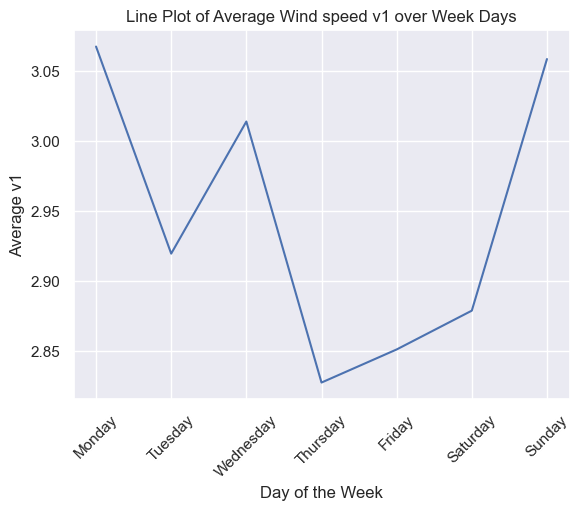

In [48]:
# Define the order of Days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday' ,'Friday', 'Saturday', 'Sunday']

# Group by 'day_of_week' and calculate mean, then sort by 'cumulated hours'
mean_data_by_weekday = weather_data.groupby('day_of_week').mean().sort_values(by='cumulated hours', ascending=False)

# Reindex to enforce the order of months
mean_data_by_weekday = mean_data_by_weekday.reindex(weekday_order)

# Create the line plot
plt.plot(mean_data_by_weekday.index, mean_data_by_weekday['v1'])

# Labeling axes and title
plt.xlabel('Day of the Week')
plt.ylabel('Average v1')
plt.title('Line Plot of Average Wind speed v1 over Week Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average Wind speed v2 over Week Days

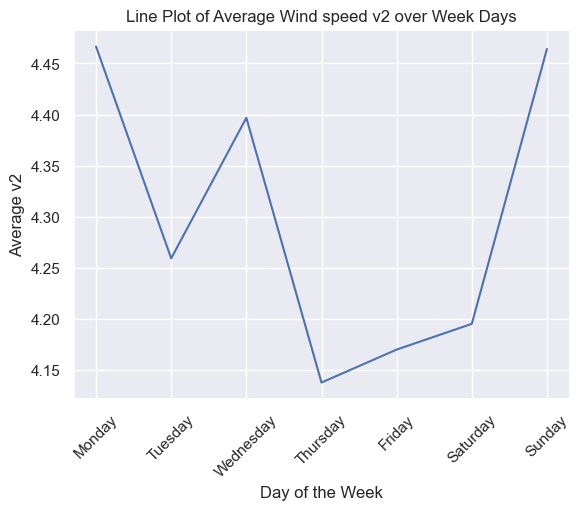

In [49]:
# Create the line plot
plt.plot(mean_data_by_weekday.index, mean_data_by_weekday['v2'])

# Labeling axes and title
plt.xlabel('Day of the Week')
plt.ylabel('Average v2')
plt.title('Line Plot of Average Wind speed v2 over Week Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average cumulated hours over Week Days

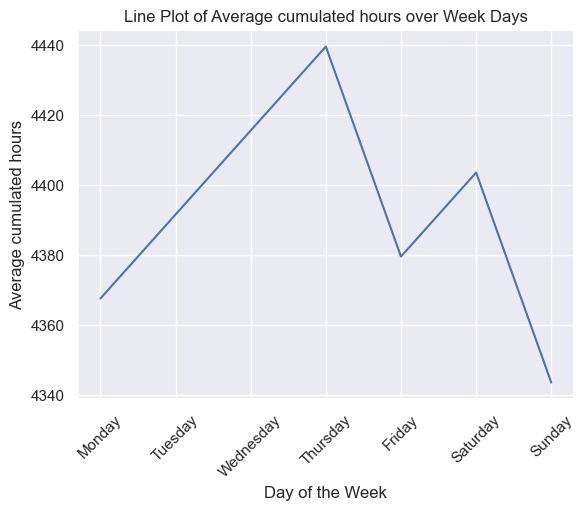

In [50]:
# Create the line plot
plt.plot(mean_data_by_weekday.index, mean_data_by_weekday['cumulated hours'])

# Labeling axes and title
plt.xlabel('Day of the Week')
plt.ylabel('Average cumulated hours')
plt.title('Line Plot of Average cumulated hours over Week Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average SWTDN over Week Days

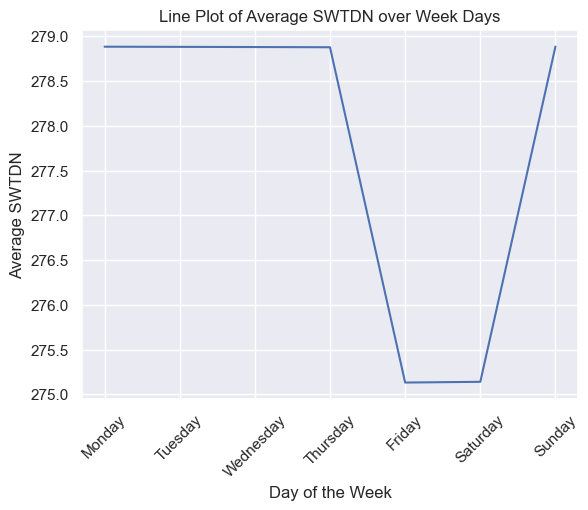

In [51]:
# Create the line plot
plt.plot(mean_data_by_weekday.index, mean_data_by_weekday['SWTDN'])

# Labeling axes and title
plt.xlabel('Day of the Week')
plt.ylabel('Average SWTDN')
plt.title('Line Plot of Average SWTDN over Week Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Line Plot of Average SWGDN over Week Days

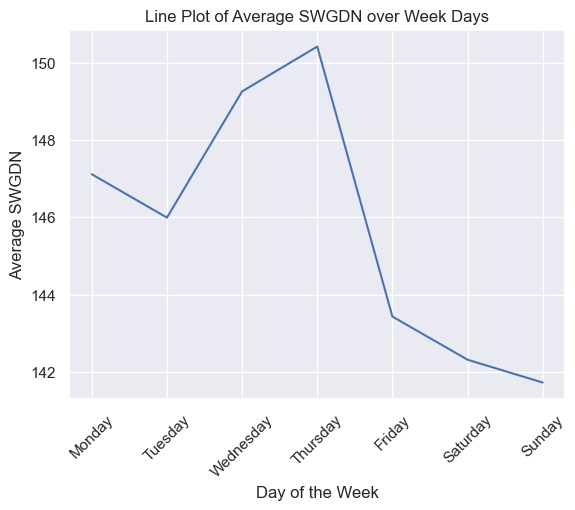

In [52]:
# Create the line plot
plt.plot(mean_data_by_weekday.index, mean_data_by_weekday['SWGDN'])

# Labeling axes and title
plt.xlabel('Day of the Week')
plt.ylabel('Average SWGDN')
plt.title('Line Plot of Average SWGDN over Week Days')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### DETAILED INSIGHTS 3

1. **Consistent Weather Patterns**:
   - Wind speeds (v1 and v2) and solar radiation levels (SWTDN and SWGDN) show consistent patterns across all days of the week.
   - There are no significant variations in temperature, air density, or pressure observed across different days of the week.

2. **Cumulated Hours**:
   - Cumulated hours, indicating observation periods, are relatively consistent throughout the week.
   - Weekdays (Monday to Friday) generally have higher cumulated hours compared to weekends (Saturday and Sunday).

3. **Weekday vs. Weekend Patterns**:
   - Weekdays (Monday to Friday) exhibit similar weather conditions, with slightly higher cumulated hours compared to weekends.
   - Weekends (Saturday and Sunday) show slightly lower cumulated hours but maintain similar wind speeds and solar radiation levels to weekdays.

4. **Moderate Wind Speeds and Solar Radiation**:
   - Wind speeds (v1 and v2) remain moderate across all days of the week, ranging from approximately 2.83 to 4.47 m/s for v1 and 4.14 to 6.30 m/s for v2.
   - Solar radiation levels (SWTDN and SWGDN) also remain moderate, with values ranging from around 275 to 282 W/m^2 for SWTDN and 141 to 150 W/m^2 for SWGDN.

5. **Stable Atmospheric Conditions**:
   - Atmospheric variables such as air density and pressure remain stable across different days of the week, with values around 1.21 for air density and approximately 98500-98600 Pa for air pressure.


#### Max of numerical columns by Day of the week

In [22]:
weather_data.groupby('day_of_week')[['cumulated hours','v1','v2','v_50m','h1','h2','z0','SWTDN','SWGDN','T','rho','p']].max().sort_values(by='cumulated hours', ascending=False)

,cumulated hours,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
day_of_week,,,,,,,,,,,,
Saturday,8783,14.46,17.97,21.91,14,22,2.50,1201.50,949.75,309.00,1.36,103723.48
Friday,8759,16.44,20.45,24.83,14,22,2.50,1201.50,981.00,308.49,1.36,103652.98
Thursday,8735,15.73,19.55,23.28,14,22,2.50,1201.00,985.75,306.96,1.35,104213.45
Wednesday,8711,15.87,19.77,23.69,14,22,2.50,1201.00,960.50,308.08,1.35,104331.87
Tuesday,8687,18.37,22.86,27.41,14,22,2.50,1201.00,952.00,306.86,1.34,104279.71
Monday,8663,18.45,22.92,26.98,14,22,2.50,1201.50,958.00,306.71,1.35,103939.06
Sunday,8639,16.92,21.05,25.09,14,22,2.50,1201.50,949.25,308.66,1.37,104018.37


### DETAILED INSIGHTS 4

1. **Wind Speed**:
   - **Saturday** recorded the highest wind speeds among all days of the week, with v1, v2, and v_50m reaching maximum values of 14.46 m/s, 17.97 m/s, and 21.91 m/s, respectively.
   - **Friday** and **Thursday** followed closely behind Saturday in terms of maximum wind speeds, with values slightly lower than Saturday.
   - Wind speeds on weekdays (**Wednesday, Tuesday, Monday**) were progressively lower compared to weekends but relatively consistent among weekdays.
   - **Sunday** recorded the lowest maximum wind speeds among all days of the week.

2. **Solar Radiation**:
   - **Saturday** also experienced the highest solar radiation levels, with SWTDN and SWGDN reaching maximum values of 1201.50 W/m^2 and 949.75 W/m^2, respectively.
   - Solar radiation levels on **Friday** and **Thursday** were similar to those observed on Saturday but slightly lower.
   - Solar radiation levels on weekdays (**Wednesday, Tuesday, Monday**) were progressively lower compared to weekends but relatively consistent among weekdays.
   - **Sunday** recorded the lowest maximum solar radiation levels among all days of the week.

3. **Atmospheric Variables**:
   - Atmospheric variables such as temperature (T), air density (rho), and air pressure (p) showed consistent patterns across all days of the week.
   - **Saturday** recorded relatively higher values for temperature, air density, and air pressure compared to other days of the week, reflecting overall favorable weather conditions.
   - Atmospheric variables on weekdays (**Wednesday, Tuesday, Monday**) were similar to those observed on **Friday** and **Thursday** but slightly lower.
   - **Sunday** recorded values for atmospheric variables consistent with those observed on other weekdays.

In summary, Saturdays tend to experience the highest wind speeds and solar radiation levels among all days of the week, indicating potentially windy and sunny conditions. Weekdays generally show lower wind speeds and solar radiation levels compared to weekends but remain relatively consistent among themselves. Atmospheric variables remain consistent across all days of the week, with Saturdays experiencing slightly higher values compared to weekdays.

## CORRELATION ANALYSIS

#### Correlation Matrix

In [23]:
#creating a correlation matrix

weather_data.corr()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
cumulated hours,1.00,0.00,0.00,-0.11,-0.12,-0.12,0.04,0.04,0.04,-0.05,-0.04,0.19,-0.04,0.12
lat,0.00,1.00,-0.00,0.51,0.43,0.36,-0.46,-0.46,-0.51,-0.03,-0.03,0.07,0.61,0.81
lon,0.00,-0.00,1.00,-0.12,-0.10,-0.08,0.18,0.18,0.18,0.00,0.00,-0.04,-0.12,-0.19
v1,-0.11,0.51,-0.12,1.00,0.98,0.88,-0.33,-0.33,-0.37,0.10,0.06,-0.02,0.36,0.38
v2,-0.12,0.43,-0.10,0.98,1.00,0.95,-0.27,-0.27,-0.30,0.05,0.02,-0.06,0.32,0.31
v_50m,-0.12,0.36,-0.08,0.88,0.95,1.00,-0.26,-0.26,-0.28,-0.12,-0.14,-0.13,0.31,0.27
h1,0.04,-0.46,0.18,-0.33,-0.27,-0.26,1.00,1.00,0.99,0.03,0.03,-0.03,-0.52,-0.67
h2,0.04,-0.46,0.18,-0.33,-0.27,-0.26,1.00,1.00,0.99,0.03,0.03,-0.03,-0.52,-0.67
z0,0.04,-0.51,0.18,-0.37,-0.30,-0.28,0.99,0.99,1.00,0.04,0.04,-0.02,-0.55,-0.70
SWTDN,-0.05,-0.03,0.00,0.10,0.05,-0.12,0.03,0.03,0.04,1.00,0.93,0.51,-0.30,-0.03


#### Heatmap

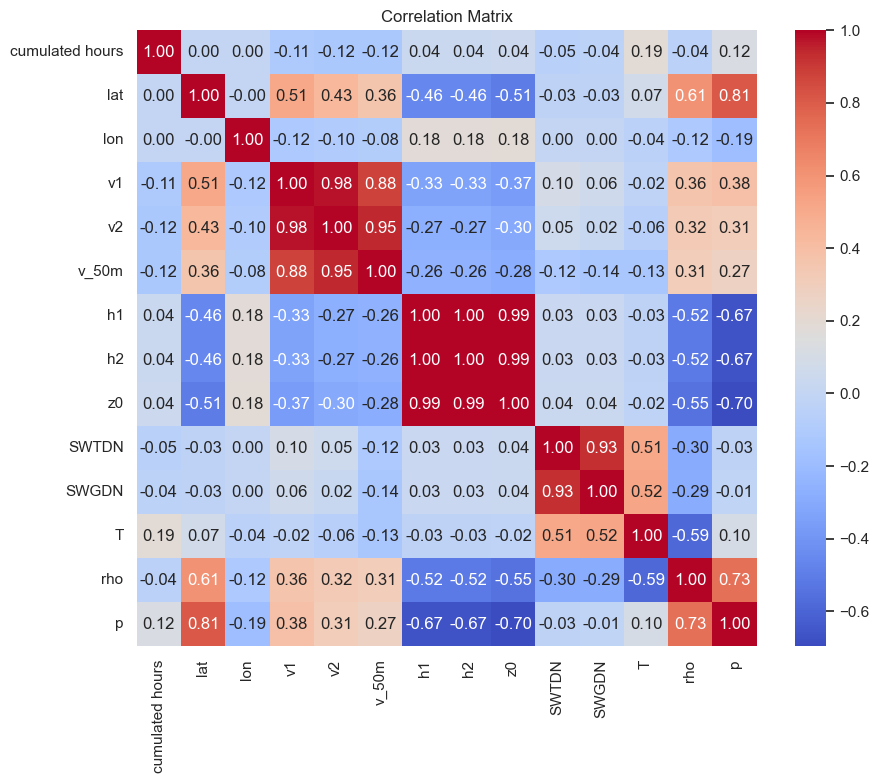

In [26]:
# Plotting the correlation matrix as a heatmap

#correlation matrix
correlation_matrix = weather_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### DETAILED INSIGHTS 5

1. **Wind Speeds (v1, v2, v_50m)**:
   - There is a strong positive correlation between v1, v2, and v_50m wind speeds, with correlation coefficients ranging from 0.88 to 1.00. This indicates that these variables are highly correlated, which is expected since they represent wind speeds at different heights above ground.
   - Wind speeds have a moderate negative correlation with latitude (around -0.46 to -0.51), suggesting that wind speeds tend to decrease as you move towards higher latitudes.

2. **Height Above Ground (h1, h2) and Roughness Length (z0)**:
   - Height above ground (h1, h2) and roughness length (z0) show strong positive correlations with each other (around 0.99 to 1.00), indicating that they are highly correlated variables.
   - There is a moderate negative correlation between height above ground (h1, h2) and wind speeds (v1, v2, v_50m), suggesting that wind speeds tend to decrease as the height above ground increases.

3. **Solar Radiation (SWTDN, SWGDN)**:
   - SWTDN (Total top-of-the-atmosphere horizontal radiation) and SWGDN (Total ground horizontal radiation) have a very high positive correlation with each other (around 0.93 to 1.00), indicating that they are highly correlated variables.
   - Solar radiation variables have a weak positive correlation with wind speeds (v1, v2, v_50m), suggesting a slight positive relationship between solar radiation and wind speeds.

4. **Temperature (T)**:
   - Temperature (T) has a moderate positive correlation with latitude (around 0.07), indicating that temperature tends to increase slightly as you move towards higher latitudes.
   - Temperature also has a moderate positive correlation with solar radiation variables (SWTDN, SWGDN), suggesting that higher solar radiation levels are associated with higher temperatures.

5. **Air Density (rho) and Air Pressure (p)**:
   - Air density (rho) and air pressure (p) have a strong positive correlation with each other (around 0.73 to 1.00), indicating that they are highly correlated variables.
   - Air density (rho) and air pressure (p) also have moderate positive correlations with latitude, suggesting that air density and air pressure tend to increase slightly as you move towards higher latitudes.


## Predictive Analysis

In [27]:
# Regression Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = weather_data[['v2', 'v_50m', 'h1', 'h2', 'SWTDN', 'SWGDN', 'T', 'rho', 'p']]
y = weather_data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

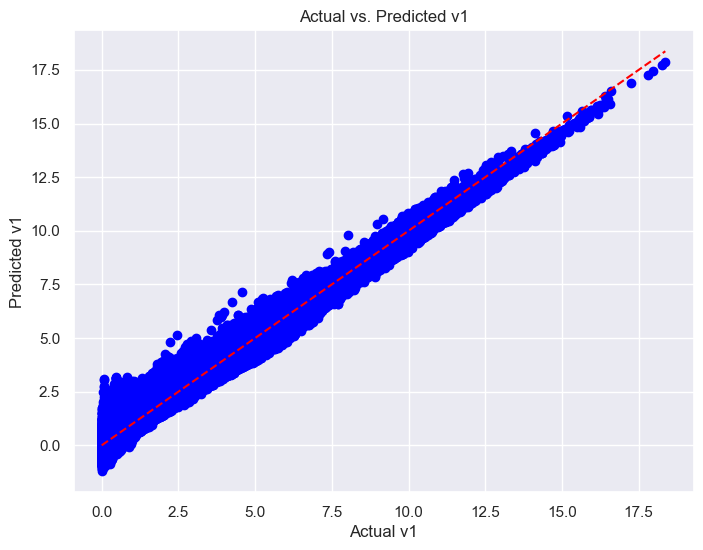

In [28]:
# Visualize Predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual v1')
plt.ylabel('Predicted v1')
plt.title('Actual vs. Predicted v1')
plt.show()


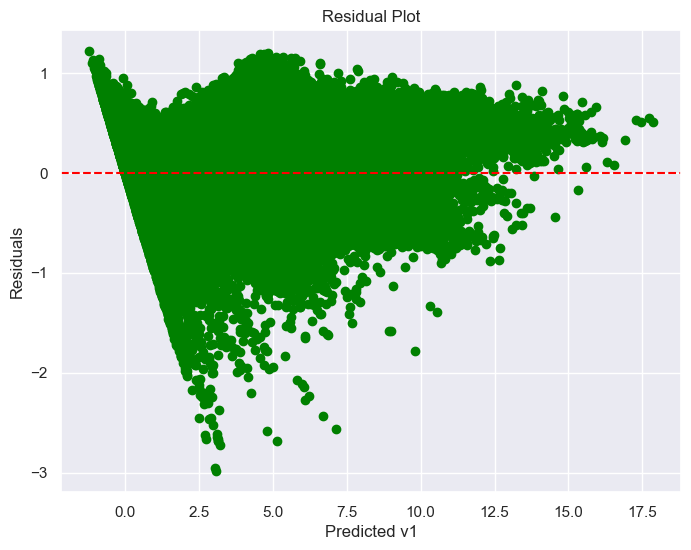

In [29]:
# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Predicted v1')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [30]:
# Cross-Validation (Optional)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.98675563 0.97819061 0.98025295 0.98289563 0.98574768]
Mean CV Score: 0.9827684991575725


In [31]:
# Model Interpretation
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ':', coef)


Intercept: -7.100445342925891
Coefficients:
v2 : 1.1648605882178524
v_50m : -0.3214523373363225
h1 : -0.02002814626997026
h2 : -0.02002814626872004
SWTDN : -0.0003360306482643261
SWGDN : 8.548989581528459e-05
T : 0.014593005472586778
rho : 1.8194594662828532
p : 1.0248021531433782e-05


Based on the cross-validation scores and coefficients obtained from the linear regression model, we can derive several insights:

1. **Model Performance**:
   - The model demonstrates strong performance across different folds of the data, as evidenced by high cross-validation scores ranging from approximately 0.978 to 0.986.
   - The mean cross-validation score of approximately 0.983 indicates that the model generalizes well to unseen data and is likely to provide reliable predictions of wind speed ('v1').

2. **Predictor Variables**:
   - 'v2' (wind speed 10 meters above displacement height) has the largest positive coefficient of approximately 1.16. This suggests that increases in 'v2' are associated with corresponding increases in predicted wind speed ('v1').
   - 'rho' (air density) also has a substantial positive coefficient of approximately 1.82, indicating that higher air density is associated with higher predicted wind speed ('v1').
   - 'T' (temperature) has a positive coefficient of approximately 0.015, suggesting that higher temperatures may lead to slightly higher predicted wind speed ('v1').
   - Other variables such as 'v_50m', 'h1', 'h2', 'SWTDN', 'SWGDN', and 'p' have relatively smaller coefficients, indicating less influence on predicted wind speed.

3. **Interpretation**:
   - The intercept of approximately -7.10 represents the baseline predicted wind speed ('v1') when all predictor variables are zero. This baseline value accounts for factors not captured by the other variables in the model.
   - The positive coefficients for 'v2', 'rho', and 'T' suggest that higher wind speeds, air density, and temperatures are associated with higher predicted wind speed ('v1').

4. **Limitations and Considerations**:
   - While the model performs well overall, it may have limitations in capturing complex interactions and nonlinear relationships between predictor variables and wind speed.
   - The coefficients provide associations but do not imply causation. Further analysis and domain expertise are needed to interpret the relationships accurately.
   - External factors not included in the model may also influence wind speed and could be considered for future model iterations.


### Save the data as csv file for data visualisation

In [32]:
# save the csv file for data visualisation

weather_data.to_csv('Weather_data.csv', index=False)